In [160]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
import matplotlib.pyplot as plt

%matplotlib inline

In [97]:
df = pd.read_csv('./dataset.csv')
df.head()

,IS,I,IJ,ED,EM,JI,EP,IVD,IVM,IVP,...,TM,TG,PID,PF,PERS,AP,APO,knowledgeArea,classification,code
0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,11.0,6.0,...,0.00,0.91,0.67,3.36,1.82,0.00,0.0,Ingeniería y Tecnología,C,COL0033023
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0,...,0.00,0.00,1.09,1.82,1.82,0.00,0.0,Ciencias Naturales,C,COL0040519
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.00,1.68,0.00,0.00,3.36,3.28,0.0,Ciencias Médicas y de la Salud,A,COL0120245
3,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.36,0.00,0.36,0.00,0.00,1.82,0.0,Ingeniería y Tecnología,A,COL0110982
4,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,3.0,...,0.00,0.00,3.82,8.85,4.76,0.00,0.0,Ingeniería y Tecnología,B,COL0165935


## Distribution of classes

In [98]:
examples, _ = df.shape
print('Total example: ', examples)

Total example:  5198


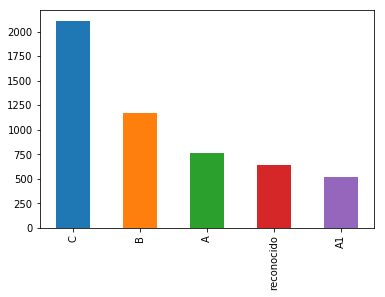

In [99]:
df['classification'].value_counts().plot.bar()

# Shuffle dataset

In [109]:
df = shuffle(df)
df.head()

,IS,I,IJ,ED,EM,JI,EP,IVD,IVM,IVP,...,TM,TG,PID,PF,PERS,AP,APO,knowledgeArea,classification,code
2933,5.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,3.0,3.0,...,4.38,9.12,4.27,0.0,0.00,0.00,0.0,Ciencias Naturales,A1,COL0008459
4764,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,5.0,...,0.00,0.00,0.00,0.0,2.95,0.00,0.0,Humanidades,reconocido,COL0155296
2988,0.0,4.0,5.0,1.0,0.0,0.0,0.0,0.0,20.0,2.0,...,13.70,38.69,1.75,0.0,3.36,1.46,0.0,Humanidades,B,COL0003614
3988,0.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0,15.0,2.0,...,8.96,0.00,0.36,0.0,10.99,2.69,0.0,Ciencias Médicas y de la Salud,B,COL0124459
4153,2.0,4.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,18.24,0.91,8.72,0.0,1.82,14.17,0.0,Ciencias Médicas y de la Salud,A1,COL0006859


In [277]:
X = df.drop(columns=['classification', 'code'])
y = df['classification']
X.head()

,IS,I,IJ,ED,EM,JI,EP,IVD,IVM,IVP,...,CCE,TD,TM,TG,PID,PF,PERS,AP,APO,knowledgeArea
2933,5.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,3.0,3.0,...,22.98,2.35,4.38,9.12,4.27,0.0,0.00,0.00,0.0,Ciencias Naturales
4764,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,5.0,...,30.30,0.00,0.00,0.00,0.00,0.0,2.95,0.00,0.0,Humanidades
2988,0.0,4.0,5.0,1.0,0.0,0.0,0.0,0.0,20.0,2.0,...,58.74,0.00,13.70,38.69,1.75,0.0,3.36,1.46,0.0,Humanidades
3988,0.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0,15.0,2.0,...,21.04,0.00,8.96,0.00,0.36,0.0,10.99,2.69,0.0,Ciencias Médicas y de la Salud
4153,2.0,4.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,40.37,1.68,18.24,0.91,8.72,0.0,1.82,14.17,0.0,Ciencias Médicas y de la Salud


In [287]:
y = y.astype('category')
y = y.cat.codes

## Normalize dataset

It's important to only normalize non-categorical features

In [194]:
X[X.drop(columns=['knowledgeArea']).columns] = StandardScaler().fit_transform(X.drop(columns=['knowledgeArea']))
X.head()

,IS,I,IJ,ED,EM,JI,EP,IVD,IVM,IVP,...,CCE,TD,TM,TG,PID,PF,PERS,AP,APO,knowledgeArea
2933,4.475978,-0.005919,0.544358,-0.156936,-0.639266,-0.201533,-0.413595,0.135526,-0.057546,0.559699,...,0.336749,1.107291,0.119006,0.369646,1.187785,-0.161568,-0.423017,-0.562131,-0.130605,Ciencias Naturales
4764,-0.517398,-0.738497,-1.009783,-0.730601,-0.639266,-0.201533,0.222084,-0.617910,-0.057546,1.378187,...,0.922838,-0.376553,-0.808934,-1.043969,-0.870145,-0.161568,0.789776,-0.562131,-0.130605,Humanidades
2988,-0.517398,2.191813,1.580452,-0.156936,-0.639266,-0.201533,-0.413595,-0.617910,5.300843,0.150455,...,3.199936,-0.376553,2.093529,4.953045,-0.026731,-0.161568,0.958333,-0.069618,-0.130605,Humanidades
3988,-0.517398,-0.005919,0.026311,-0.730601,1.985876,-0.201533,-0.413595,-0.617910,3.724846,0.150455,...,0.181420,-0.376553,1.089319,-1.043969,-0.696642,-0.161568,4.095150,0.345308,-0.130605,Ciencias Médicas y de la Salud
4153,1.479953,2.191813,1.580452,-0.730601,-0.639266,-0.201533,-0.413595,0.135526,-0.687945,-0.668033,...,1.729110,0.684238,3.055367,-0.902918,3.332466,-0.161568,0.325214,4.217948,-0.130605,Ciencias Médicas y de la Salud


## Encode categorical features

In [195]:
X = pd.get_dummies(X, columns=['knowledgeArea'])
X.head()

,IS,I,IJ,ED,EM,JI,EP,IVD,IVM,IVP,...,PF,PERS,AP,APO,knowledgeArea_Ciencias Agrícolas,knowledgeArea_Ciencias Médicas y de la Salud,knowledgeArea_Ciencias Naturales,knowledgeArea_Ciencias Sociales,knowledgeArea_Humanidades,knowledgeArea_Ingeniería y Tecnología
2933,4.475978,-0.005919,0.544358,-0.156936,-0.639266,-0.201533,-0.413595,0.135526,-0.057546,0.559699,...,-0.161568,-0.423017,-0.562131,-0.130605,0,0,1,0,0,0
4764,-0.517398,-0.738497,-1.009783,-0.730601,-0.639266,-0.201533,0.222084,-0.617910,-0.057546,1.378187,...,-0.161568,0.789776,-0.562131,-0.130605,0,0,0,0,1,0
2988,-0.517398,2.191813,1.580452,-0.156936,-0.639266,-0.201533,-0.413595,-0.617910,5.300843,0.150455,...,-0.161568,0.958333,-0.069618,-0.130605,0,0,0,0,1,0
3988,-0.517398,-0.005919,0.026311,-0.730601,1.985876,-0.201533,-0.413595,-0.617910,3.724846,0.150455,...,-0.161568,4.095150,0.345308,-0.130605,0,1,0,0,0,0
4153,1.479953,2.191813,1.580452,-0.730601,-0.639266,-0.201533,-0.413595,0.135526,-0.687945,-0.668033,...,-0.161568,0.325214,4.217948,-0.130605,0,1,0,0,0,0


## Split data in training and testing datasets

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Support vector machine Training

In [130]:
cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=0)

In [132]:
train_sizes = np.linspace(.1, 1.0, 5)
train_sizes

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [162]:
svc_clf = LinearSVC()

In [165]:
svc_clf.fit(X_train, y_train)
score = svc_clf.score(X_test, y_test)
print(score)

0.6326923076923077


In [133]:
train_sizes, train_scores, test_scores = learning_curve(
        sgd_clf, X, y, cv=cv, n_jobs=3, train_sizes=train_sizes)

In [134]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [135]:
train_sizes

array([ 415, 1351, 2286, 3222, 4158])

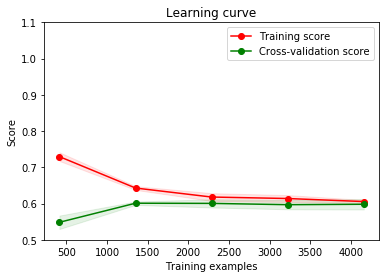

In [136]:
plt.figure()
plt.title('Learning curve')
plt.ylim(0.5, 1.1)
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

## K-nearest Neighbors 

In [168]:
X.head()

,IS,I,IJ,ED,EM,JI,EP,IVD,IVM,IVP,...,PF,PERS,AP,APO,knowledgeArea_Ciencias Agrícolas,knowledgeArea_Ciencias Médicas y de la Salud,knowledgeArea_Ciencias Naturales,knowledgeArea_Ciencias Sociales,knowledgeArea_Humanidades,knowledgeArea_Ingeniería y Tecnología
2933,4.475978,-0.005919,0.544358,-0.156936,-0.639266,-0.201533,-0.413595,0.135526,-0.057546,0.559699,...,-0.161568,-0.423017,-0.562131,-0.130605,0,0,1,0,0,0
4764,-0.517398,-0.738497,-1.009783,-0.730601,-0.639266,-0.201533,0.222084,-0.617910,-0.057546,1.378187,...,-0.161568,0.789776,-0.562131,-0.130605,0,0,0,0,1,0
2988,-0.517398,2.191813,1.580452,-0.156936,-0.639266,-0.201533,-0.413595,-0.617910,5.300843,0.150455,...,-0.161568,0.958333,-0.069618,-0.130605,0,0,0,0,1,0
3988,-0.517398,-0.005919,0.026311,-0.730601,1.985876,-0.201533,-0.413595,-0.617910,3.724846,0.150455,...,-0.161568,4.095150,0.345308,-0.130605,0,1,0,0,0,0
4153,1.479953,2.191813,1.580452,-0.730601,-0.639266,-0.201533,-0.413595,0.135526,-0.687945,-0.668033,...,-0.161568,0.325214,4.217948,-0.130605,0,1,0,0,0,0


In [169]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10, n_jobs=2)

In [170]:
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=2, n_neighbors=10, p=2,
           weights='uniform')

In [179]:
query_idx = 0
query = X.iloc[query_idx].tolist()
neigbors = neigh.kneighbors([query], 10)
distances = neigbors[0]
indices = neigbors[1]
print(distances)
print('10 Nearest neighbors of group', df.iloc[query_idx]['code'], '\n')
for idx in indices[0]:
    neighbor = df.iloc[idx]
    print(neighbor['code'], neighbor['classification'], neighbor['knowledgeArea'])

[[0.         3.34421026 3.71592739 3.93733881 3.95658225 3.9805142
  4.03016083 4.03782049 4.09873801 4.11096479]]
10 Nearest neighbors of group COL0008459 

COL0008459 A1 Ciencias Naturales
COL0028023 A1 Ciencias Naturales
COL0025639 A Ciencias Naturales
COL0022529 A1 Ciencias Naturales
COL0005904 A1 Ingeniería y Tecnología
COL0045552 A1 Ingeniería y Tecnología
COL0012309 B Ciencias Médicas y de la Salud
COL0014153 B Ciencias Médicas y de la Salud
COL0013728 A1 Ciencias Naturales
COL0014832 A1 Ciencias Médicas y de la Salud


## PCA and feature analysis for knowledge area: Ciencias Naturales

In [198]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [288]:
this_X = X[X['knowledgeArea' ] == 'Ciencias Naturales'].drop(columns=['knowledgeArea'])
this_y = y[X['knowledgeArea' ] == 'Ciencias Naturales']
this_X[this_X.columns] = StandardScaler().fit_transform(this_X)
this_X.head()

,IS,I,IJ,ED,EM,JI,EP,IVD,IVM,IVP,...,CCO,CCE,TD,TM,TG,PID,PF,PERS,AP,APO
2933,3.937753,0.138537,0.486920,-0.220481,-0.685711,-0.246779,-0.513809,-0.013267,0.254263,0.247891,...,-0.432077,0.789837,1.030862,0.293882,0.631932,1.181851,-0.183851,-0.355262,-0.571750,-0.133995
1720,0.254416,0.138537,-0.572077,-0.733349,-0.685711,-0.246779,-0.007824,-0.728218,-0.855041,1.269649,...,2.132112,0.423849,-0.480286,1.076620,1.577638,-0.685079,-0.183851,-0.355262,1.822128,-0.133995
2999,1.175250,0.138537,-1.101576,0.805257,-0.252959,-0.246779,-0.007824,-0.013267,0.624031,0.247891,...,0.091294,-1.340877,0.104882,0.975104,-0.118958,1.329869,-0.183851,-0.355262,-0.571750,-0.133995
62,-0.666418,-0.775621,3.134414,0.292388,0.179793,-0.246779,-0.513809,0.701683,3.582177,3.994338,...,1.743698,2.710302,0.104882,-0.633114,2.892169,3.306619,-0.183851,-0.355262,0.013687,-0.133995
372,1.175250,0.138537,-0.572077,-0.733349,0.612545,-0.246779,-0.513809,0.701683,-0.485273,-0.773868,...,-0.432077,-0.338302,2.271933,0.472870,-0.137872,0.112305,-0.183851,0.585715,0.013687,-0.133995


In [289]:
print(this_X.shape)
print(this_y.shape)

(970, 38)
(970,)


### Vis in 2 components

In [293]:
pca_2 = PCA(n_components=2)
pca_2.fit(this_X)
X_pca_2 = pca_2.transform(this_X)

In [281]:
pca_2.explained_variance_ratio_

array([0.12993521, 0.07821415])

In [294]:
this_y

2933    1
1720    0
2999    1
62      0
372     0
2951    3
2938    1
4211    3
3100    3
3232    3
4339    2
2493    3
23      0
743     3
1229    1
1246    4
5191    4
1243    0
332     3
1247    0
3190    4
1847    3
48      0
595     4
2542    2
1490    2
3842    3
4704    3
1238    1
3617    3
       ..
4143    1
3105    3
3405    3
977     0
3171    1
1907    3
4030    3
3910    0
2317    3
767     3
2957    0
3021    3
870     0
2633    3
3268    3
2724    4
5159    2
2684    3
3267    3
4739    3
1015    3
2410    3
5165    4
175     3
4952    2
2115    0
504     3
3701    3
445     3
1657    0
Length: 970, dtype: int8

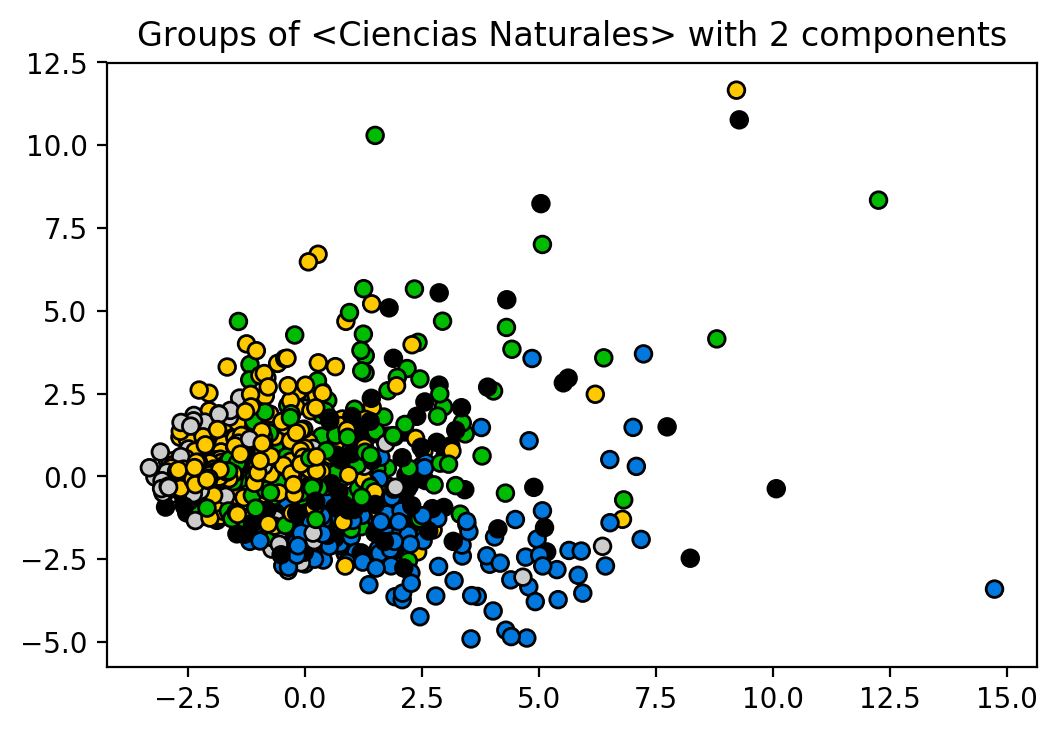

In [291]:
fig, ax = plt.subplots(dpi=200)
ax.set_title('Groups of <Ciencias Naturales> with 2 components')
ax.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=this_y.values, cmap=plt.cm.nipy_spectral, edgecolor='k')

### Vis in 3 components

In [220]:
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X)
X_pca_3

array([[ 1.56259242,  2.94871126, -1.33113415],
       [-2.19249021, -0.20869338,  0.91882499],
       [ 4.81210738, -3.29153687,  1.16499213],
       ...,
       [ 1.44124433, -1.93977044,  1.34194953],
       [-0.77347935, -1.21654096,  0.03419721],
       [ 1.24951593, -1.97158049,  1.05070054]])

In [221]:
pca_3.explained_variance_ratio_

array([0.47539841, 0.29157966, 0.23302193])

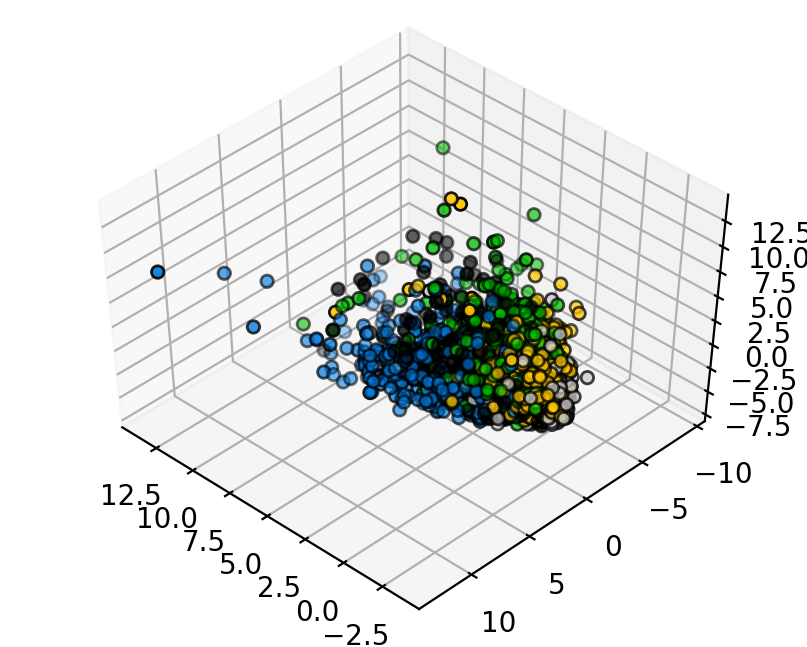

In [235]:
fig = plt.figure(1, figsize=(4, 3), dpi=200)
plt.plot(X, 'o', color="g", label="Data in 3 components")
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], c=y.values.tolist(), cmap=plt.cm.nipy_spectral, edgecolor='k')

plt.show()

In [236]:
from sklearn.cluster import MiniBatchKMeans
mini_kmeans = MiniBatchKMeans(n_clusters=5)
mini_kmeans = mini_kmeans.fit(X_pca_2)

In [241]:
pred = mini_kmeans.predict(X_pca_2)
out_df = pd.DataFrame({'label': pred})
out_df['label'].value_counts()

3    2475
1    1237
0     888
2     494
4     104
Name: label, dtype: int64